In [1]:
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

# 2 Qubits Case

### Case 1: Oracle for |w⟩=|00⟩

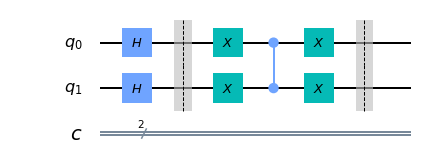

In [2]:
qc=QuantumCircuit(2,2)
qc.h([0,1])
qc.barrier()
qc.x([0,1])
qc.cz(0,1)
qc.x([0,1])
qc.barrier()
qc.draw("mpl")

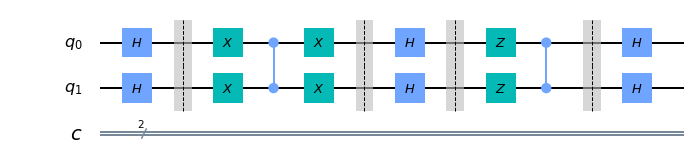

In [3]:
qc.h([0,1])
qc.barrier()
qc.z([0,1])
qc.cz(0,1)
qc.barrier()
qc.h([0,1])
qc.draw("mpl")

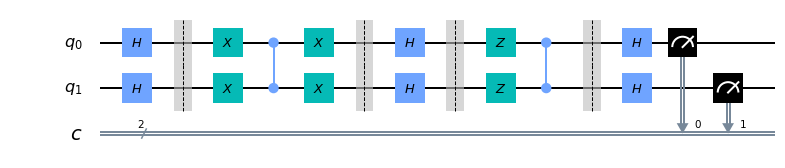

In [4]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

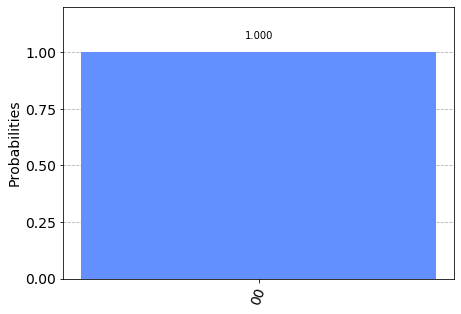

In [5]:
from qiskit.visualization import plot_histogram as hist
counts=execute(qc,backend=Aer.get_backend(name="qasm_simulator"),shots=1024).result().get_counts()
hist(counts)

In [6]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_ourense


In [8]:
job = execute(qc, backend=backend, shots = 2048)
job_monitor(job)

Job Status: job has successfully run


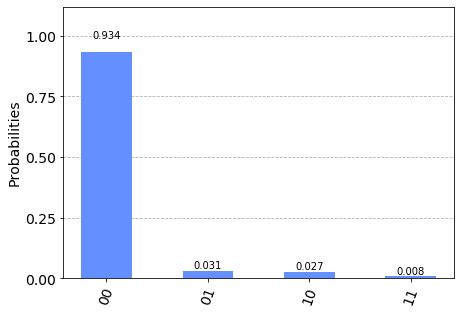

In [9]:
counts = job.result().get_counts()
hist(counts)

### Case 1: Oracle for |w⟩=|01⟩

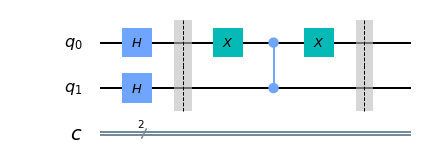

In [57]:
qc=QuantumCircuit(2,2)
qc.h([0,1])
qc.barrier()
qc.x(0)
qc.cz(0,1)
qc.x(0)
qc.barrier()
qc.draw("mpl")

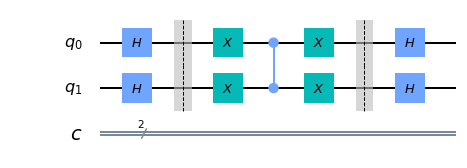

In [58]:
dif=QuantumCircuit(2,2)
dif.h([0,1])
dif.barrier()
dif.x([0,1])
dif.cz(0,1)
dif.x([0,1])
dif.barrier()
dif.h([0,1])
dif.draw("mpl")

In [59]:
u=execute(dif,backend=Aer.get_backend(name="unitary_simulator")).result().get_unitary()
print(u)

[[ 0.5-1.2246468e-16j -0.5+1.2246468e-16j -0.5+1.2246468e-16j
  -0.5+1.2246468e-16j]
 [-0.5+6.1232340e-17j  0.5-1.8369702e-16j -0.5+6.1232340e-17j
  -0.5+1.8369702e-16j]
 [-0.5+6.1232340e-17j -0.5+6.1232340e-17j  0.5-1.8369702e-16j
  -0.5+1.8369702e-16j]
 [-0.5+0.0000000e+00j -0.5+1.2246468e-16j -0.5+1.2246468e-16j
   0.5-2.4492936e-16j]]


In [60]:
qc=qc+dif

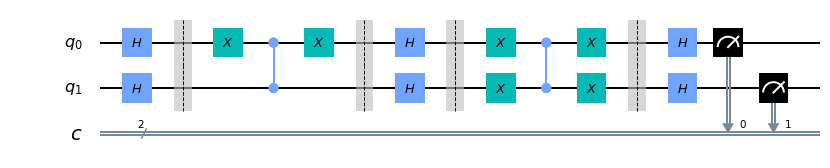

In [61]:
qc.measure([0,1],[0,1])
qc.draw("mpl")

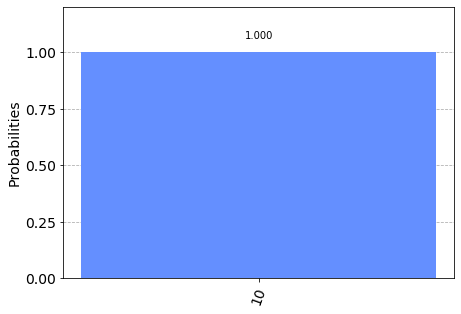

In [62]:
counts=execute(qc,backend=Aer.get_backend(name="qasm_simulator"),shots=1024).result().get_counts()
hist(counts)

In [63]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-06-18 13:56:00,464: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_essex


In [64]:
job = execute(qc, backend=backend, shots = 2048)
job_monitor(job)

Job Status: job has successfully run


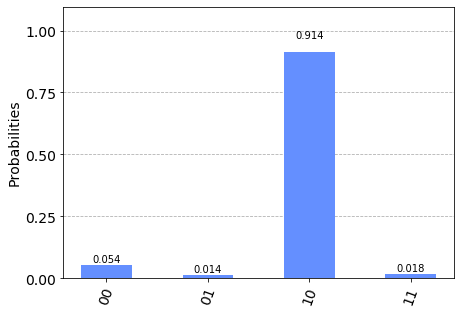

In [65]:
counts = job.result().get_counts()
hist(counts)

# 3 Qubits Case

### We now go through the example of Grover's algorithm for 3 qubits with two marked states  |101⟩  and  |110⟩

In [66]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)
    
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)


In [67]:
n = 3
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

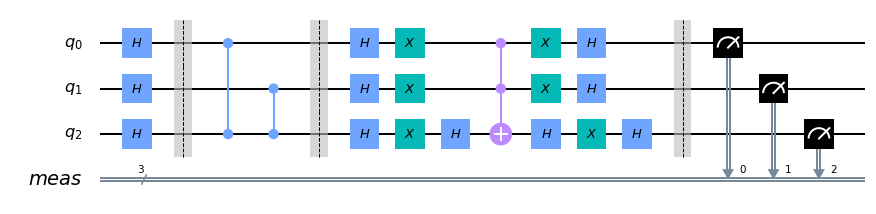

In [68]:
grover_circuit.draw(output="mpl")

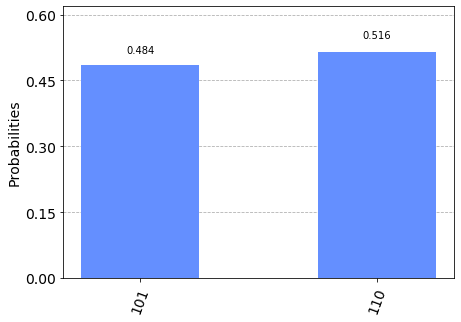

In [69]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
hist(answer)

In [73]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-06-18 14:00:43,603: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_essex


In [74]:
job = execute(grover_circuit, backend=backend, shots = 2048)
job_monitor(job)

Job Status: job has successfully run


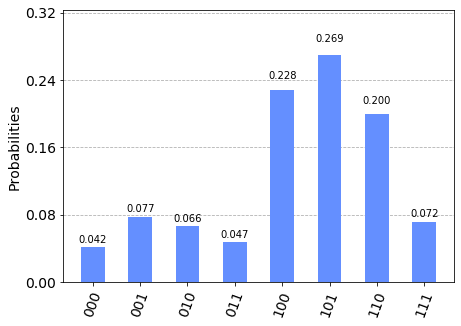

In [75]:
counts = job.result().get_counts()
hist(counts)